In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
tweets_df = pd.read_csv('elon_twitter_database\elon_sentsubj.csv')
btc_values_df = pd.read_csv('bitcoin_database\Cleaned\BTCUSDT.csv')
doge_values_df = pd.read_csv('dogecoin_database\Cleaned\DOGEUSDT.csv')

cyrpto_btcval_tweets = pd.read_csv('crypto_btcval_tweets.csv')
cyrpto_dogeval_tweets = pd.read_csv('crypto_dogeval_tweets.csv')

In [17]:
# Creating new dataframes for plotting Tweets Per Day vs Trades Per Day
btc_values_df['Open Time'] = pd.to_datetime(btc_values_df['Open Time'],unit='ms')
bitcoin_values_df = btc_values_df[['Open Time', 'Trades']]
bitcoin_values_df = bitcoin_values_df.groupby(pd.to_datetime(bitcoin_values_df['Open Time']).dt.date).agg({'Trades': 'sum'}).reset_index() 
bitcoin_values_df.columns = ['Date', 'Btc Trades']
bitcoin_values_df.drop(bitcoin_values_df.head(4).index, inplace=True)

doge_values_df['Open Time'] = pd.to_datetime(doge_values_df['Open Time'],unit='ms')
dogecoin_values_df = doge_values_df[['Open Time', 'Trades']]
dogecoin_values_df = dogecoin_values_df.groupby(pd.to_datetime(dogecoin_values_df['Open Time']).dt.date).agg({'Trades': 'sum'}).reset_index() 
dogecoin_values_df.columns = ['Date', 'Doge Trades']

all_tweets_df = tweets_df[['created_at', 'tweet']]
all_tweets_df = all_tweets_df.groupby(pd.to_datetime(all_tweets_df['created_at']).dt.date).agg({'tweet': 'count'}).reset_index() 
all_tweets_df.columns = ['Date', 'Tweets']

merged_tweet_values = all_tweets_df.merge(bitcoin_values_df, on='Date', how='right').merge(dogecoin_values_df, on='Date', how='left')

In [18]:
# Fill days Elon didn't tweet with '0'
merged_tweet_values = merged_tweet_values.fillna(0)

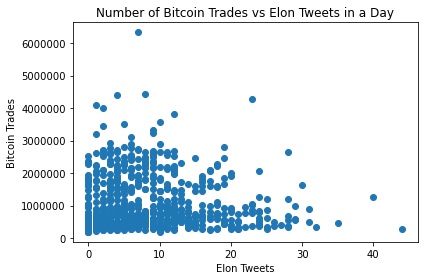

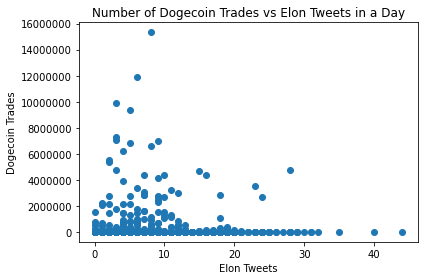

In [19]:
# Compare Tweets vs Trades per day
# One plot per coin type
fig, ax = plt.subplots()
ax.plot(merged_tweet_values['Tweets'], merged_tweet_values['Btc Trades'], 'o')
plt.ylabel('Bitcoin Trades')
plt.xlabel('Elon Tweets')
plt.title('Number of Bitcoin Trades vs Elon Tweets in a Day')
ax.ticklabel_format(style='plain')
plt.tight_layout()
fig.savefig('images/twitter_btc_trades.png', dpi=fig.dpi)

fig, ax = plt.subplots()
ax.plot(merged_tweet_values['Tweets'], merged_tweet_values['Doge Trades'], 'o')
plt.ylabel('Dogecoin Trades')
plt.xlabel('Elon Tweets')
plt.title('Number of Dogecoin Trades vs Elon Tweets in a Day')
ax.ticklabel_format(style='plain')
plt.tight_layout()
fig.savefig('images/twitter_doge_trades.png', dpi=fig.dpi)

In [20]:
# Scatter Plots for Bitcoin

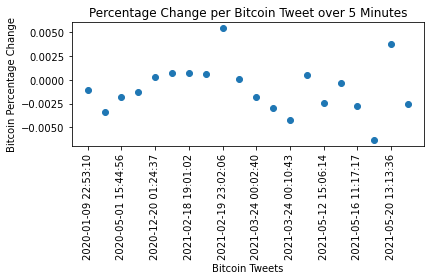

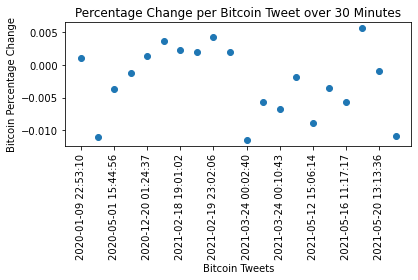

In [21]:
btc_btc_tweet_df = cyrpto_btcval_tweets[cyrpto_btcval_tweets['is_btc'] > 0]
fig, ax = plt.subplots()
ax.plot(btc_btc_tweet_df['created_at'], btc_btc_tweet_df['5 minutes change pct'], 'o')
ax.set(xlabel='Bitcoin Tweets', ylabel='Bitcoin Percentage Change', title='BTC Percentage Change per Bitcoin Tweet over 5 Minutes')
ax.set_xticks(ax.get_xticks()[::2])
plt.xticks(rotation=90)
plt.tight_layout()
fig.savefig('images/Btc_5minutes.png', dpi=fig.dpi)

fig, ax = plt.subplots()
ax.plot(btc_btc_tweet_df['created_at'], btc_btc_tweet_df['30 minutes change pct'], 'o')
ax.set(xlabel='Bitcoin Tweets', ylabel='Bitcoin Percentage Change', title='BTC Percentage Change per Bitcoin Tweet over 30 Minutes')
ax.set_xticks(ax.get_xticks()[::2])
plt.xticks(rotation=90)
plt.tight_layout()
fig.savefig('images/Btc_30minutes.png', dpi=fig.dpi)

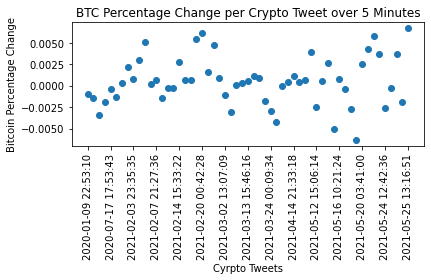

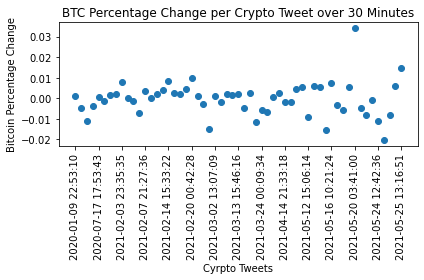

In [22]:
btc_crypto_tweets_df = cyrpto_btcval_tweets[cyrpto_btcval_tweets['is_crypto'] > 0]
fig, ax = plt.subplots()
ax.plot(btc_crypto_tweets_df['created_at'], btc_crypto_tweets_df['5 minutes change pct'], 'o')
ax.set(xlabel='Cyrpto Tweets', ylabel='Bitcoin Percentage Change', title='BTC Percentage Change per Crypto Tweet over 5 Minutes')
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=90)
plt.tight_layout()
fig.savefig('images/btc_crypto_5minutes.png', dpi=fig.dpi)

fig, ax = plt.subplots()
ax.plot(btc_crypto_tweets_df['created_at'], btc_crypto_tweets_df['30 minutes change pct'], 'o')
ax.set(xlabel='Cyrpto Tweets', ylabel='Bitcoin Percentage Change', title='BTC Percentage Change per Crypto Tweet over 30 Minutes')
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=90)
plt.tight_layout()
fig.savefig('images/btc_crypto_30minutes.png', dpi=fig.dpi)

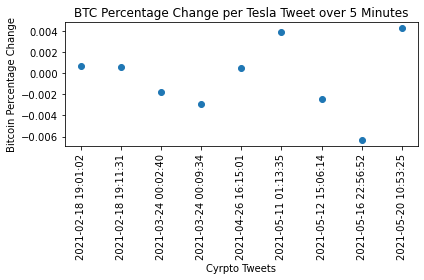

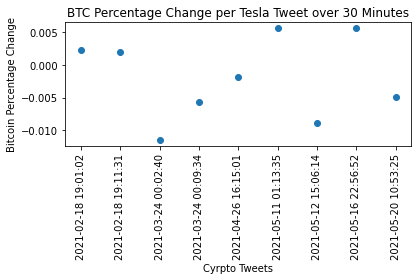

In [23]:
btc_tesla_tweets_df = cyrpto_btcval_tweets[cyrpto_btcval_tweets['is_tesla'] > 0]
fig, ax = plt.subplots()
ax.plot(btc_tesla_tweets_df['created_at'], btc_tesla_tweets_df['5 minutes change pct'], 'o')
ax.set(xlabel='Cyrpto Tweets', ylabel='Bitcoin Percentage Change', title='BTC Percentage Change per Tesla Tweet over 5 Minutes')
plt.xticks(rotation=90)
plt.tight_layout()
fig.savefig('images/btc_tesla_5minutes.png', dpi=fig.dpi)

fig, ax = plt.subplots()
ax.plot(btc_tesla_tweets_df['created_at'], btc_tesla_tweets_df['30 minutes change pct'], 'o')
ax.set(xlabel='Cyrpto Tweets', ylabel='Bitcoin Percentage Change', title='BTC Percentage Change per Tesla Tweet over 30 Minutes')
plt.xticks(rotation=90)
plt.tight_layout()
fig.savefig('images/btc_tesla_30minutes.png', dpi=fig.dpi)

In [24]:
# Scatter Plots for Dogecoin

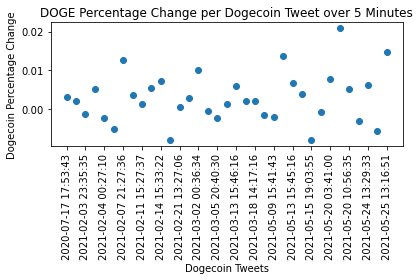

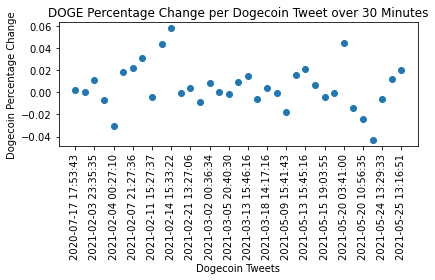

In [25]:
only_doge_tweet_df = cyrpto_dogeval_tweets[cyrpto_dogeval_tweets['is_doge'] > 0]
fig, ax = plt.subplots()
ax.plot(only_doge_tweet_df['created_at'], only_doge_tweet_df['5 minutes change pct'], 'o')
ax.set(xlabel='Dogecoin Tweets', ylabel='Dogecoin Percentage Change', title='DOGE Percentage Change per Dogecoin Tweet over 5 Minutes')
ax.set_xticks(ax.get_xticks()[::2])
plt.xticks(rotation=90)
plt.tight_layout()
fig.savefig('images/doge_5minutes.png', dpi=fig.dpi)

fig, ax = plt.subplots()
ax.plot(only_doge_tweet_df['created_at'], only_doge_tweet_df['30 minutes change pct'], 'o')
ax.set(xlabel='Dogecoin Tweets', ylabel='Dogecoin Percentage Change', title='DOGE Percentage Change per Dogecoin Tweet over 30 Minutes')
ax.set_xticks(ax.get_xticks()[::2])
plt.xticks(rotation=90)
plt.tight_layout()
fig.savefig('images/doge_30minutes.png', dpi=fig.dpi)

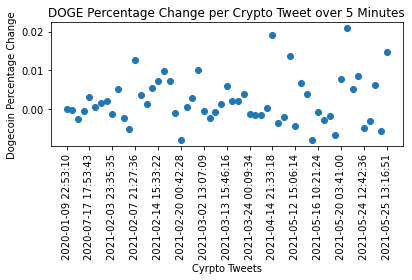

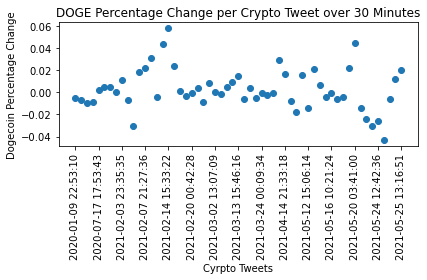

In [26]:
only_crypto_tweets_df = cyrpto_dogeval_tweets[cyrpto_dogeval_tweets['is_crypto'] > 0]
fig, ax = plt.subplots()
ax.plot(only_crypto_tweets_df['created_at'], only_crypto_tweets_df['5 minutes change pct'], 'o')
ax.set(xlabel='Cyrpto Tweets', ylabel='Dogecoin Percentage Change', title='DOGE Percentage Change per Crypto Tweet over 5 Minutes')
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=90)
plt.tight_layout()
fig.savefig('images/doge_crypto_5minutes.png', dpi=fig.dpi)

fig, ax = plt.subplots()
ax.plot(only_crypto_tweets_df['created_at'], only_crypto_tweets_df['30 minutes change pct'], 'o')
ax.set(xlabel='Cyrpto Tweets', ylabel='Dogecoin Percentage Change', title='DOGE Percentage Change per Crypto Tweet over 30 Minutes')
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=90)
plt.tight_layout()
fig.savefig('images/doge_crypto_30minutes.png', dpi=fig.dpi)

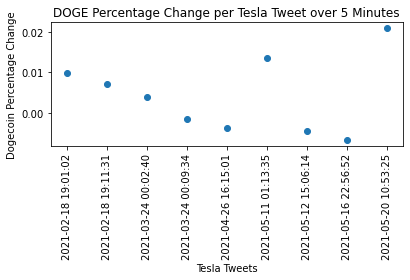

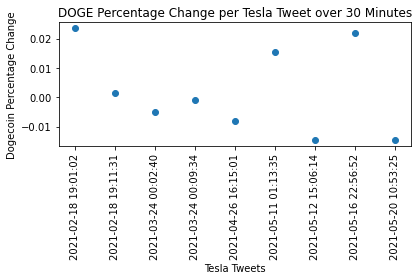

In [27]:
only_tesla_tweets_df = cyrpto_dogeval_tweets[cyrpto_dogeval_tweets['is_tesla'] > 0]
fig, ax = plt.subplots()
ax.plot(only_tesla_tweets_df['created_at'], only_tesla_tweets_df['5 minutes change pct'], 'o')
ax.set(xlabel='Tesla Tweets', ylabel='Dogecoin Percentage Change', title='DOGE Percentage Change per Tesla Tweet over 5 Minutes')
plt.xticks(rotation=90)
plt.tight_layout()
fig.savefig('images/doge_tesla_5minutes.png', dpi=fig.dpi)

fig, ax = plt.subplots()
ax.plot(only_tesla_tweets_df['created_at'], only_tesla_tweets_df['30 minutes change pct'], 'o')
ax.set(xlabel='Tesla Tweets', ylabel='Dogecoin Percentage Change', title='DOGE Percentage Change per Tesla Tweet over 30 Minutes')
plt.xticks(rotation=90)
plt.tight_layout()
fig.savefig('images/doge_tesla_30minutes.png', dpi=fig.dpi)

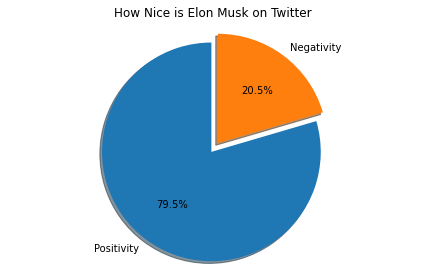

In [28]:
polarity_df = tweets_df['polarity']
positive_count = polarity_df[polarity_df > 0].count()
negative_count = polarity_df[polarity_df < 0].count()

labels = 'Positivity', 'Negativity'
polarity = [positive_count, negative_count]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(polarity, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('How Nice is Elon Musk on Twitter')

plt.tight_layout()
fig1.savefig('images/tweet_polarity.png', dpi=fig.dpi)